In [2]:
getwd()

[1] "C:/Users/qlian/OneDrive/Desktop/Grad Fall 2020 Courses/EAS 506 Statistical Mining I/WEEK12-14"

In [333]:
# library(arules)
# library(gbm)
# library(mlbench)
# library(miceadds)
# library(caret)
# library(rattle)
# library(MLmetrics)
# library(kernlab)
# library(rpart)
# library(rpart.plot)
# library(randomForest)
# library(class)
# library(pdp)
# library(vip)
# library(ggplot2)


# Q1- Part (a)
- Apply bagging, boosting, and random forests to a data set of your choice (not
one used in the committee machines labs). Fit the models on a training set and
evaluate them on a test set.

## Dataset Description

- The titanic dataset is from a Kaggle competition. The dataset consists of passengers of the sunken ship, and whether or not each passenger as survived the accident. The goal is to predict, what kind of passengers will most likely to survive the crashing of the titanic.

## Load the Dataset

In [191]:
titanic <- read.csv(file = "C:/Users/qlian/OneDrive/Desktop/Grad Fall 2020 Courses/EAS 506 Statistical Mining I/WEEK12-14/titanic.csv", header = TRUE) 


In [155]:
dim(titanic)

[1] 891  12

In [156]:
head(titanic)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [157]:
str(titanic)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


#### "Name", " Ticket"  and "Cabin " have hundreds of unique value, assuming these are not indicative of the response variables, we can drop them 

In [192]:
titanic <- titanic[,-c(4,9,11)]

In [193]:
names(titanic)

[1] "PassengerId" "Survived"    "Pclass"      "Sex"         "Age"        
[6] "SibSp"       "Parch"       "Fare"        "Embarked"

#### Missing values
- we have missing values in age, let's take a look at it 

In [194]:
colSums(is.na(titanic))

PassengerId    Survived      Pclass         Sex         Age       SibSp 
          0           0           0           0         177           0 
      Parch        Fare    Embarked 
          0           0           0

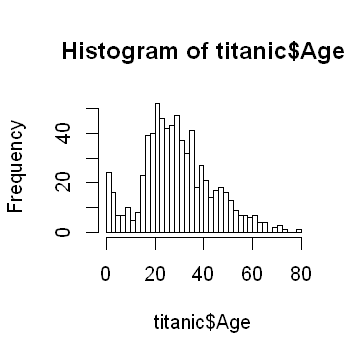

In [195]:
options(repr.plot.width=3, repr.plot.height=3)

hist(titanic$Age,breaks=30)

#### Extract the rows with missing values

In [196]:
missing_val <- subset(titanic, is.na(titanic$Age))

In [197]:
summary(missing_val)

  PassengerId       Survived          Pclass          Sex           Age     
 Min.   :  6.0   Min.   :0.0000   Min.   :1.000   female: 53   Min.   : NA  
 1st Qu.:230.0   1st Qu.:0.0000   1st Qu.:3.000   male  :124   1st Qu.: NA  
 Median :452.0   Median :0.0000   Median :3.000                Median : NA  
 Mean   :435.6   Mean   :0.2938   Mean   :2.599                Mean   :NaN  
 3rd Qu.:634.0   3rd Qu.:1.0000   3rd Qu.:3.000                3rd Qu.: NA  
 Max.   :889.0   Max.   :1.0000   Max.   :3.000                Max.   : NA  
                                                               NA's   :177  
     SibSp           Parch             Fare        Embarked
 Min.   :0.000   Min.   :0.0000   Min.   :  0.00    : 0    
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:  7.75   C:38    
 Median :0.000   Median :0.0000   Median :  8.05   Q:49    
 Mean   :0.565   Mean   :0.1808   Mean   : 22.16   S:90    
 3rd Qu.:0.000   3rd Qu.:0.0000   3rd Qu.: 24.15           
 Max.   :8.000   Max.   

In [179]:
summary(titanic)

  PassengerId       Survived          Pclass          Sex           Age       
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   female:314   Min.   : 0.42  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   male  :577   1st Qu.:20.12  
 Median :446.0   Median :0.0000   Median :3.000                Median :28.00  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                Mean   :29.70  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                3rd Qu.:38.00  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                Max.   :80.00  
                                                               NA's   :177    
     SibSp           Parch             Fare                Cabin     Embarked
 Min.   :0.000   Min.   :0.0000   Min.   :  0.00              :687    :  2   
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:  7.91   B96 B98    :  4   C:168   
 Median :0.000   Median :0.0000   Median : 14.45   C23 C25 C27:  4   Q: 77   
 Mean   :0.523   Mean   :0.3816   Mean   : 32.20   G6   

- By lookign at the summary of the rows with missing values, and the summary of the whole dataset, we can see that the mean of each variable is similar to that of the whole dataset. We can assume that the Age variable's missing variables is missing by random. More over the Age variable's distribution appears to be normal, we can then imptue the missing values by filling it in with mean.

#### Imptue the missing variables

In [198]:
titanic$Age[is.na(titanic$Age)] = mean(titanic$Age, na.rm=TRUE)

In [199]:
sum(is.na(titanic))

[1] 0

- no missing variables

#### The response variable has "int" data type, we need to factorize it into {0,1}

In [186]:
head(titanic$Survived)

[1] 0 1 1 1 0 0

In [200]:
titanic$Survived = as.factor(titanic$Survived)

## Train Test Split

In [399]:
set.seed(895678)

In [400]:
inTrain <- createDataPartition(y = titanic$Survived,p = 0.7,list = FALSE)
titanic_train <-titanic[inTrain,]
titanic_test <-titanic[-inTrain,]

## Bagged Trees

In [401]:
bag_titanic <- randomForest(Survived~.,data=titanic_train,n.tree=500,mtry=8)

#### Making Prediction

In [436]:
bag_titanic_pred <- predict(bag_titanic,newdata=titanic_test,type="response")

In [437]:
titanic_cm <- confusionMatrix(data = bag_titanic_pred, reference=titanic_test$Survived)

In [438]:
titanic_cm$table

          Reference
Prediction   0   1
         0 144  34
         1  20  68

In [439]:
bag_titanic_accuracy <- titanic_cm$overall['Accuracy']
bag_titanic_accuracy

Accuracy 
0.7969925

## Random Forest

In [440]:
rf_titanic <- randomForest(Survived~.,data=titanic_train,n.tree=500)

#### Making Prediction

In [441]:
rf_titanic_pred <- predict(rf_titanic,newdata=titanic_test,type="response")

In [442]:
titanic_cm <- confusionMatrix(data = rf_titanic_pred, reference=titanic_test$Survived)

In [443]:
titanic_cm$table

          Reference
Prediction   0   1
         0 148  29
         1  16  73

In [444]:
rf_titanic_accuracy <- titanic_cm$overall['Accuracy']
rf_titanic_accuracy

Accuracy 
0.8308271

## Gradient Boosting

In [411]:
temp_train <- titanic_train
temp_test <- titanic_test

In [412]:
temp_train$Survived <- as.numeric(titanic_train$Survived)-1
temp_test$Survived <- as.numeric(titanic_test$Survived)-1


In [413]:
gb_titanic <-gbm(
    formula = Survived ~ .,
    distribution = "bernoulli",
    data = temp_train,
    n.trees = 500,
    interaction.depth = 3,
    shrinkage = 0.1,
    verbose = FALSE
    )  

In [414]:
gb_titanic_pred <- predict(object=gb_titanic,newdata=temp_test,n.trees=500,type="response")

In [415]:
head(gb_titanic_pred)

[1] 0.24888771 0.03838607 0.91373051 0.93191626 0.92211011 0.10944293

In [416]:
gb_titanic_pred <- ifelse(gb_titanic_pred > 0.5, 1, 0)

#### Making Prediction

In [417]:
titanic_cm <- confusionMatrix(data = as.factor(gb_titanic_pred), reference = titanic_test$Survived)

In [419]:
titanic_cm$table

          Reference
Prediction   0   1
         0 145  38
         1  19  64

In [421]:
gb_titanic_accuracy <- titanic_cm$overall['Accuracy']
gb_titanic_accuracy

Accuracy 
0.7857143

# Q1 - Part (b)
- How accurate are these results compared to more simplistic (non-ensemble)
methods (e.g., logistic regression, kNN, etc)? Use the same test/training as in
part A.

## KNN

In [244]:
sum(is.na(titanic_test))

[1] 0

#### Set neighbors and fit knn

- we will run knn over a large range of number of neighbors, and get the optimal k value, we will then take that value as our final prediction accuracy

In [422]:
neighbors = c(seq(5,105,2))

In [423]:
knn_titanic_accuracy <- rep(NA,length(neighbors)) 

for(i in 1:length(neighbors)){
    #prediction 
    knn_pred_test <- knn(train=data.matrix(titanic_train),test=data.matrix(titanic_test),cl=titanic_train$Survived,k=neighbors[i])

    #training and testing accuracy
    cm <- confusionMatrix(data = as.factor(knn_pred_test), reference = titanic_test$Survived)
    acc <-  cm$overall['Accuracy']
    
    #store mse and accuracy values
    knn_titanic_accuracy[i] <- acc
    
}


In [424]:
best_k_val <- which.max(knn_titanic_accuracy)
best_k_val

[1] 7

In [425]:
knn_titanic_accuracy <- max(knn_titanic_accuracy)
knn_titanic_accuracy

[1] 0.6729323

## Binary Logistic Regression

In [426]:
log_titanic <-glm(Survived ~.,data=titanic_train, family="binomial")

In [428]:
log_titanic_pred <- predict(log_titanic,type="response",newdata=titanic_test)

#### glm outputs probability vector, we will threshold it by 0.5

In [430]:
head(log_titanic_pred)

1          8          9         10         12         14 
0.07741564 0.08434595 0.52481837 0.87456152 0.81653622 0.02471700

In [431]:
log_titanic_pred <- ifelse(log_titanic_pred > 0.5, 1, 0)

In [432]:
titanic_cm <- confusionMatrix(data = as.factor(log_titanic_pred), reference=titanic_test$Survived)

In [433]:
titanic_cm$table

          Reference
Prediction   0   1
         0 139  29
         1  25  73

In [434]:
log_titanic_accuracy <- titanic_cm$overall['Accuracy']
log_titanic_accuracy

Accuracy 
0.7969925

## Performance Comparison

In [447]:
cbind.data.frame(bag_titanic_accuracy,rf_titanic_accuracy,gb_titanic_accuracy,knn_titanic_accuracy,log_titanic_accuracy)

,bag_titanic_accuracy,rf_titanic_accuracy,gb_titanic_accuracy,knn_titanic_accuracy,log_titanic_accuracy
Accuracy,0.7969925,0.8308271,0.7857143,0.6729323,0.7969925


- Random forest algorithm resulted in the highest accuracy, around ~4% higher than the rest.
- KNN resulted in the lowest accuracy, ~3% lower than the rest 
- bagging, gradient boost, and logistic regression resulted in similar prediction accuracy, with gradient boosting being slightly lower than the other two. (Although, the tuning parameters for the gbm function can be further tuned)
- overall, ensemble method does not always outperform the more simplistic models.

# Q1 - Part (c)
- What are some advantages (and disadvantages) do committee machines have
related to the data set that you selected?

- advantages
    
    - minimal data preparation for ensemble method is needed
    - not sensitive to outliers 
    - stable, I split the data differents times, and even in different ratio, the prediction accuracy did not change drastically.
    - 
- disadvantages
    - although ensemble method is not sensitive to missing values, but for the packages used you still have to clean or impute the missing values. Of course, this has to be done for KNN and logistic regression as well
    - a lot of tuning parameter for gbm function, although not fully explored in this homework. (I suspect the lower prediction accuracy comes from not having the optimal tuning parameters.) I have seen articles where more discovery is done on research the optimal parameter. This method is generally more exhaustive 
    - loss of intepretation

# Q2 
- Consider the pima data. Use boosting, random forests and a single tree (CART
model). Comment on your performance. Explore the partial dependence plots for
those variables that are have high ranking “variable importance”. 

### Load the dataset 

In [283]:
pima <- PimaIndiansDiabetes

In [5]:
dim(pima)

[1] 768   9

In [448]:
names(pima)

[1] "pregnant" "glucose"  "pressure" "triceps"  "insulin"  "mass"     "pedigree"
[8] "age"      "diabetes"

In [7]:
sum(is.na(pima))

[1] 0

In [8]:
str(pima)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


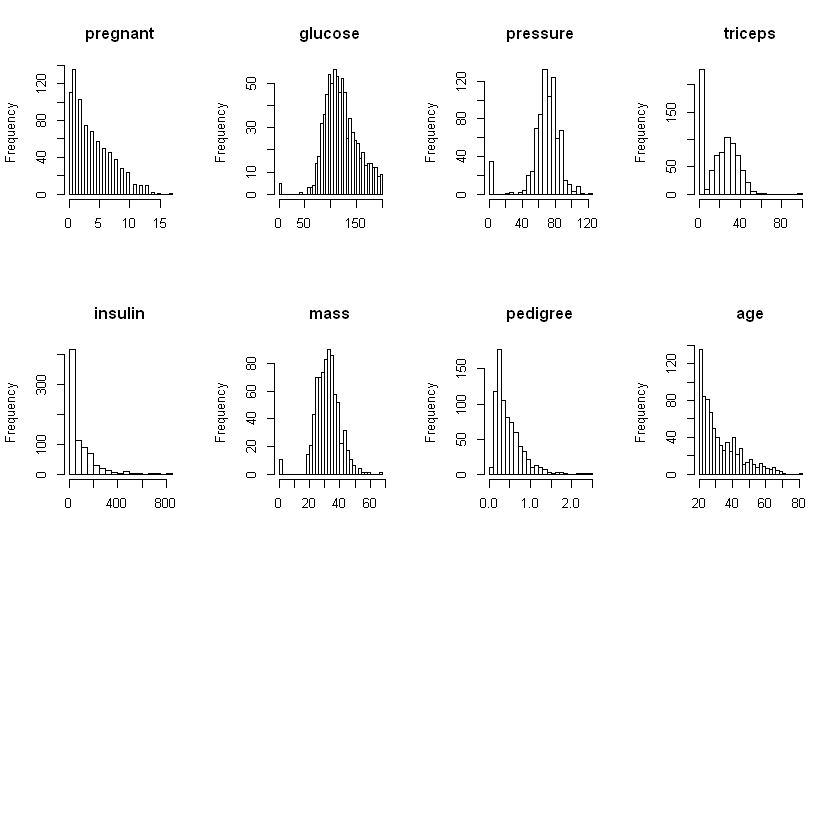

In [9]:
par(mfrow = c(3,4))
for (i in 1:8) {
  hist((pima[,i]),breaks = 30,main=names(pima)[i],xlab=NULL)
}

- Pima consists of 768 observations and 8 features, not including the response variable "diabetes". The response "diabetes" is a 2-level factor variable, making this a binary classification problem. All 8 independent varaibles are numerical variables. No missing values is presented. Some variables exihibit positive skews, these are "pregnant", "tricep","insulin","pedigree","age".

## Train Test Split

In [449]:
set.seed(32820)

In [450]:
inTrain <- createDataPartition(y = pima$diabetes,p = 0.7,list = FALSE)
pima_train <-pima[inTrain,]
pima_test <-pima[-inTrain,]

## Griadient Boosting

####  Factorize the response variable to {0,1}

In [451]:
temp_train = pima_train
temp_test = pima_test

In [452]:
temp_train$diabetes <- (as.numeric(pima_train$diabetes)-1)
temp_test$diabetes <- (as.numeric(pima_test$diabetes)-1)

#### Fit gradient boosting

In [453]:
gb_pima <- gbm(
  formula = diabetes ~ .,
  distribution = "bernoulli",
  data = temp_train,
  n.trees = 1000,
  interaction.depth = 3,
  shrinkage = 0.1,
  verbose = FALSE
  )  


#### Making prediction

In [454]:
gb_pima_pred <- predict(object=gb_pima,newdata=temp_test,n.trees=1000,type="response")

- predict function returns probability of getting 0 or 1, we need to threshold the values for comparison with other models

#### gbm function outputs a probabilities of each case, we need to threshold them to obtain the acacuracy 

In [455]:
head(gb_pima_pred)

[1] 0.8961805064 0.0000572892 0.1884415485 0.8319344617 0.0114278176
[6] 0.1426217575

In [456]:
gb_pima_pred <- ifelse(gb_pima_pred > 0.5, 1, 0)

In [457]:
pima_cm <- confusionMatrix(data = as.factor(gb_pima_pred), reference = as.factor(temp_test$diabetes))

In [458]:
pima_cm$table

          Reference
Prediction   0   1
         0 120  30
         1  30  50

In [459]:
gb_pima_accuracy <- pima_cm$overall['Accuracy']
gb_pima_accuracy 

Accuracy 
0.7391304

#### Variable Importance

Warning message in vip.default(gb_pima, size = 0.5):
"Arguments `width`, `alpha`, `color`, `fill`, `size`, and `shape` have all been deprecated in favor of the new `mapping` and `aesthetics` arguments. They will be removed in version 0.3.0."

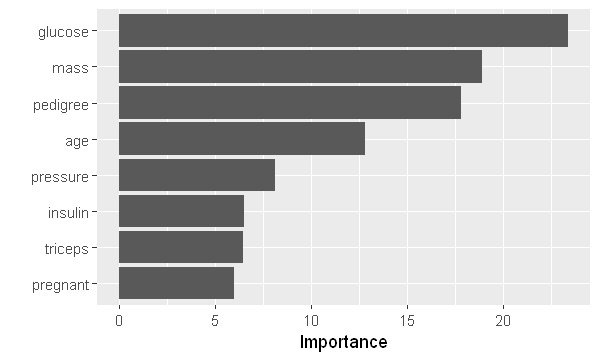

In [460]:
options(repr.plot.width=5, repr.plot.height=3)
vip(gb_pima, size = 0.5)  

#### Partial Dependence Plot

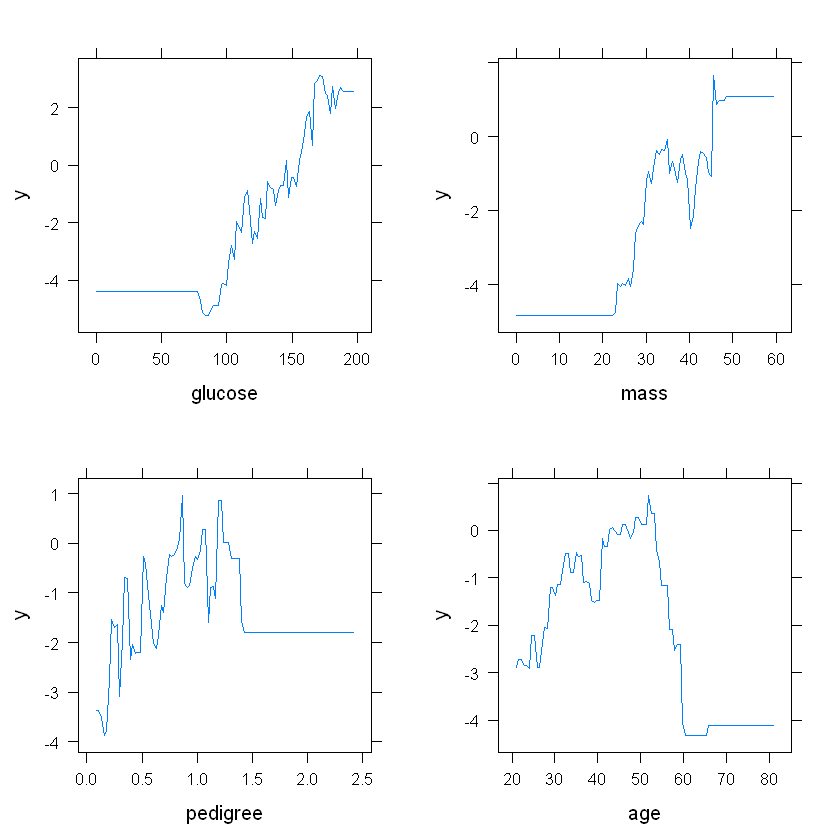

In [461]:

options(repr.plot.width=7, repr.plot.height=7)
glucose = plot(gb_pima, i.var= "glucose")
mass = plot(gb_pima, i.var= "mass")
pedigree = plot(gb_pima, i.var= "pedigree")
age = plot(gb_pima, i.var= "age")

grid.arrange(glucose,mass,pedigree, age, ncol = 2)  


- partial plot does not work with gbm function. gbm.plot() function is then used. We can see that, glucose and mass have similar effects on the response variable. Beggining with a flat curve and leading to a proportionally increasing linear relationship. Pedigree and age behave the same, starting with positive relationship as the values of features increase, followed by a drastic dip and a flat curve. 

## Random Forest

#### Fit random forest

In [462]:
rf_pima <- randomForest(diabetes~.,data=pima_train,n.tree=5000)

#### Making Prediction

In [463]:
rf_pima_pred <- predict(rf_pima,newdata=pima_test,type="response")

In [464]:
pima_cm <- confusionMatrix(data = rf_pima_pred, reference = pima_test$diabetes)

In [465]:
pima_cm$table

          Reference
Prediction neg pos
       neg 126  30
       pos  24  50

In [466]:
rf_pima_accuracy <- pima_cm$overall['Accuracy']
rf_pima_accuracy

Accuracy 
0.7652174

#### Variable Importance

Warning message in vip.default(rf_pima, size = 0.5):
"Arguments `width`, `alpha`, `color`, `fill`, `size`, and `shape` have all been deprecated in favor of the new `mapping` and `aesthetics` arguments. They will be removed in version 0.3.0."

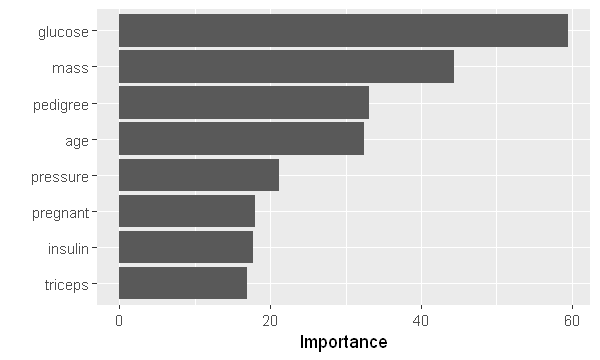

In [467]:
options(repr.plot.width=5, repr.plot.height=3)
vip(rf_pima, size = 0.5)  

#### Partial Dependence Plot
- plotting pdp for glucose, mass, pedigree anad age because there is a clear break between age and pressure. Also, the importance for variables after age is pretty uniform and low.

Warning message:
"Use of `object[[1L]]` is discouraged. Use `.data[[1L]]` instead."Warning message:
"Use of `object[["yhat"]]` is discouraged. Use `.data[["yhat"]]` instead."Warning message:
"Use of `object[[1L]]` is discouraged. Use `.data[[1L]]` instead."Warning message:
"Use of `object[["yhat"]]` is discouraged. Use `.data[["yhat"]]` instead."`geom_smooth()` using method = 'loess'
Warning message:
"Use of `object[[1L]]` is discouraged. Use `.data[[1L]]` instead."Warning message:
"Use of `object[["yhat"]]` is discouraged. Use `.data[["yhat"]]` instead."Warning message:
"Use of `object[[1L]]` is discouraged. Use `.data[[1L]]` instead."Warning message:
"Use of `object[["yhat"]]` is discouraged. Use `.data[["yhat"]]` instead."`geom_smooth()` using method = 'loess'
Warning message:
"Use of `object[[1L]]` is discouraged. Use `.data[[1L]]` instead."Warning message:
"Use of `object[["yhat"]]` is discouraged. Use `.data[["yhat"]]` instead."Warning message:
"Use of `object[[1L]]` is discourag

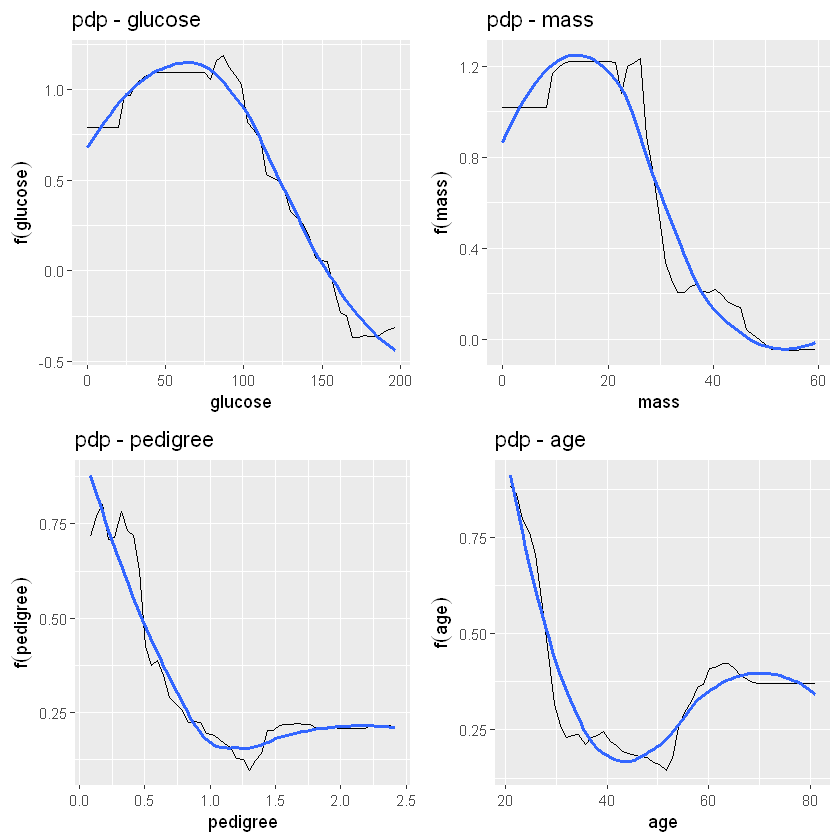

In [468]:
options(repr.plot.width=7, repr.plot.height=7)

glucose <- rf_pima %>%  
  partial(pred.var = "glucose") %>%
  autoplot(smooth = TRUE, ylab = expression(f(glucose))) +
  ggtitle("pdp - glucose")
mass <- rf_pima %>%  
  partial(pred.var = "mass") %>%
  autoplot(smooth = TRUE, ylab = expression(f(mass))) +
  ggtitle("pdp - mass")
pedigree <- rf_pima %>% 
  partial(pred.var = "pedigree") %>%
  autoplot(smooth = TRUE, ylab = expression(f(pedigree))) +
  ggtitle("pdp - pedigree")
age <- rf_pima %>%  
  partial(pred.var = "age") %>%
  autoplot(smooth = TRUE, ylab = expression(f(age))) +
  ggtitle("pdp - age")
grid.arrange(glucose,mass,pedigree, age, ncol = 2)  

- we can see the glucose and mass have similar effect on the outcome, and pedigree and age have similar effec t on the outcome. 

## Single Tree

#### Fitting a regression tree

In [469]:
model_control <- rpart.control(minsplit=10,xval=10,cp=0)
fit_pima <- rpart(diabetes~.,data=pima_train,method="class",control=model_control)

#### Plotting the full tree

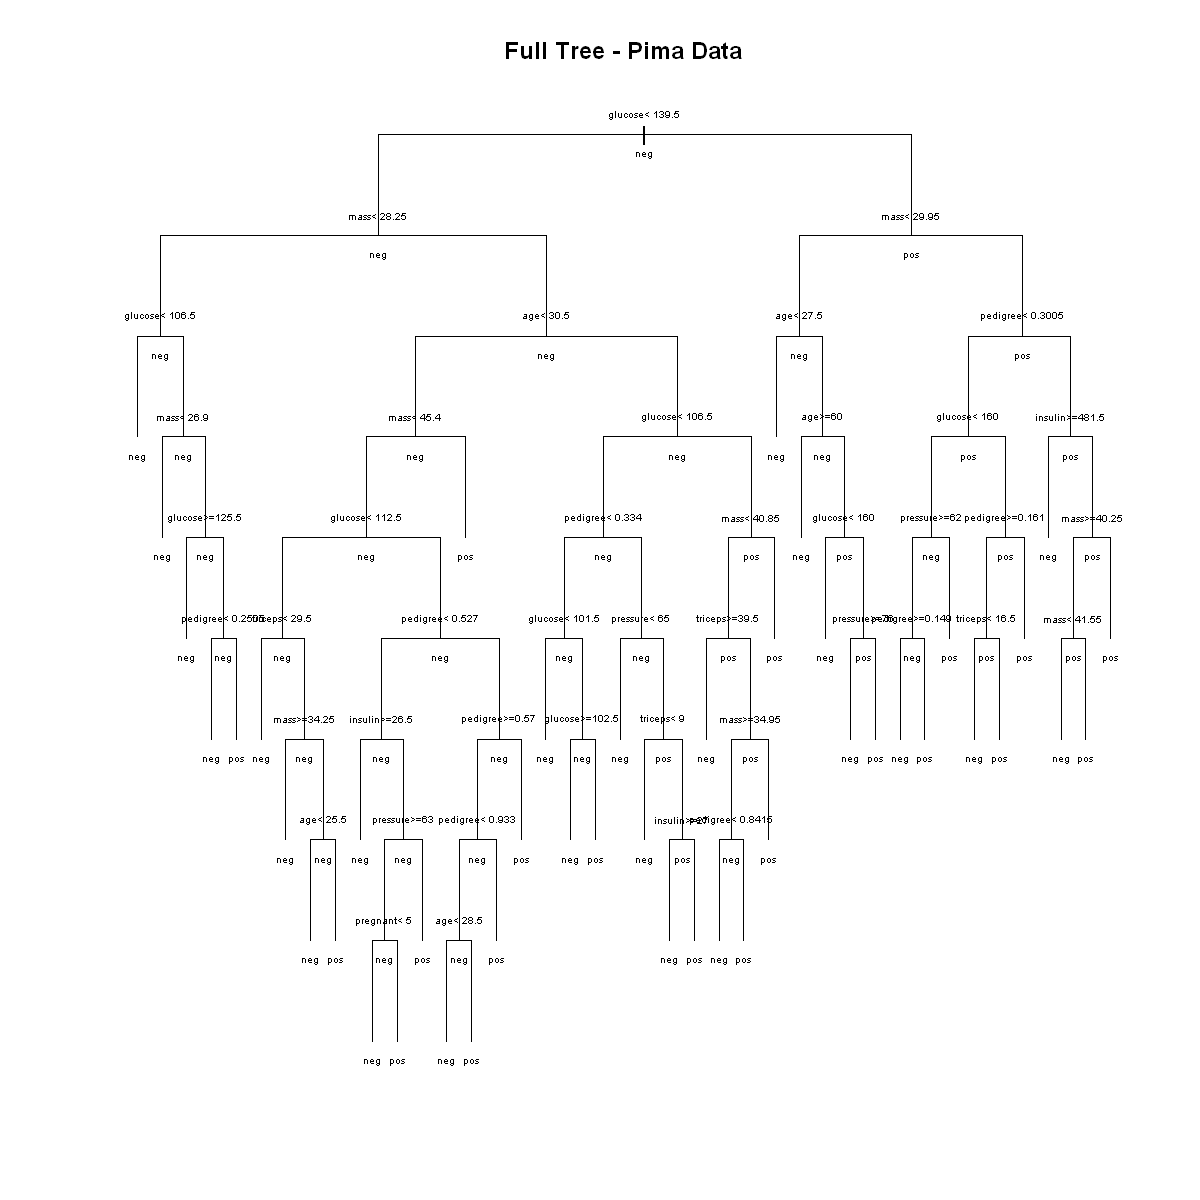

In [470]:
options(repr.plot.width=10, repr.plot.height=10)

plot(fit_pima,uniform=T,compress=T,main="Full Tree - Pima Data")
text(fit_pima,cex=0.5,all=T)

#### Making Prediction

In [471]:
fit_pima_pred <- predict(fit_pima, pima_test, type = "class")

In [472]:
pima_cm <- confusionMatrix(data = fit_pima_pred, reference=pima_test$diabetes)

In [473]:
pima_cm$table

          Reference
Prediction neg pos
       neg 120  35
       pos  30  45

In [474]:
cart_pima_accuracy = pima_cm$overall['Accuracy']
cart_pima_accuracy

Accuracy 
0.7173913

#### Variable Importance

Warning message in vip.default(fit_pima, size = 0.5):
"Arguments `width`, `alpha`, `color`, `fill`, `size`, and `shape` have all been deprecated in favor of the new `mapping` and `aesthetics` arguments. They will be removed in version 0.3.0."

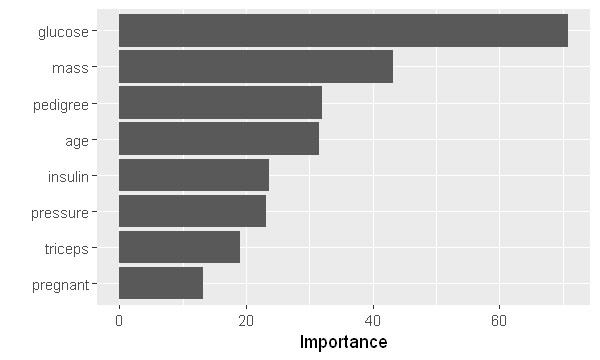

In [475]:
options(repr.plot.width=5, repr.plot.height=3)
vip(fit_pima, size = 0.5)  

#### Partial Dependence Plot
- plotting pdp for glucose, mass, pedigree anad age because there is a clear break between age and pressure. Also, the importance for variables after age is pretty uniform and low.

Warning message:
"Use of `object[[1L]]` is discouraged. Use `.data[[1L]]` instead."Warning message:
"Use of `object[["yhat"]]` is discouraged. Use `.data[["yhat"]]` instead."Warning message:
"Use of `object[[1L]]` is discouraged. Use `.data[[1L]]` instead."Warning message:
"Use of `object[["yhat"]]` is discouraged. Use `.data[["yhat"]]` instead."`geom_smooth()` using method = 'loess'
Warning message:
"Use of `object[[1L]]` is discouraged. Use `.data[[1L]]` instead."Warning message:
"Use of `object[["yhat"]]` is discouraged. Use `.data[["yhat"]]` instead."Warning message:
"Use of `object[[1L]]` is discouraged. Use `.data[[1L]]` instead."Warning message:
"Use of `object[["yhat"]]` is discouraged. Use `.data[["yhat"]]` instead."`geom_smooth()` using method = 'loess'
Warning message:
"Use of `object[[1L]]` is discouraged. Use `.data[[1L]]` instead."Warning message:
"Use of `object[["yhat"]]` is discouraged. Use `.data[["yhat"]]` instead."Warning message:
"Use of `object[[1L]]` is discourag

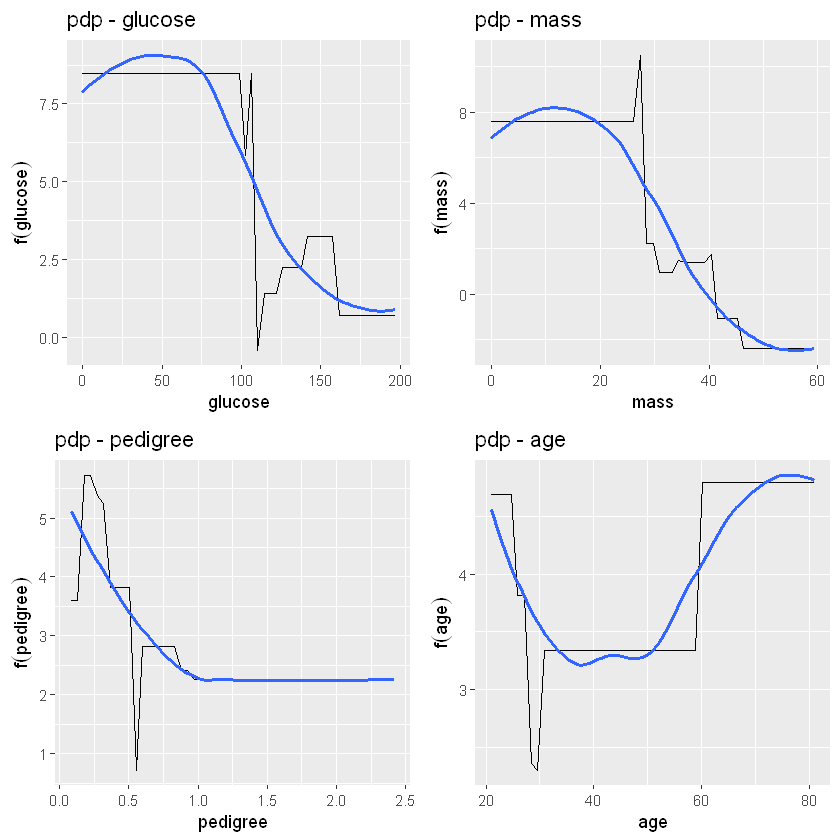

In [476]:
options(repr.plot.width=7, repr.plot.height=7)

glucose <- fit_pima %>%  
  partial(pred.var = "glucose") %>%
  autoplot(smooth = TRUE, ylab = expression(f(glucose))) +
  ggtitle("pdp - glucose")
mass <- fit_pima %>%  
  partial(pred.var = "mass") %>%
  autoplot(smooth = TRUE, ylab = expression(f(mass))) +
  ggtitle("pdp - mass")
pedigree <- fit_pima %>% 
  partial(pred.var = "pedigree") %>%
  autoplot(smooth = TRUE, ylab = expression(f(pedigree))) +
  ggtitle("pdp - pedigree")
age <- fit_pima %>%  
  partial(pred.var = "age") %>%
  autoplot(smooth = TRUE, ylab = expression(f(age))) +
  ggtitle("pdp - age")
grid.arrange(glucose,mass,pedigree, age, ncol = 2)  

- glucose and mass behave similarly in single tree as in random forest. We can see that the relationship is a lot more noisy. In pedigree, the relationship seems to be monotonically decreasing, probability of diabetes decrease as pedicure increases until it gets saturated around 2.5. Probability of getting diabetes decease and then increase, the dop accors at around age 25-60.

## Performance Comparison

In [486]:
cbind(rf_pima_accuracy,gb_pima_accuracy,cart_pima_accuracy)

,rf_pima_accuracy,gb_pima_accuracy,cart_pima_accuracy
Accuracy,0.7652174,0.7391304,0.7173913


- the ensemble method outperformed the single tree method. Random forest resulted in the highest prediction accuracy.
- Important to note that, all three algorithms has ranked "glucose","mass","pedigree","age" as the four msot import features in order. Significantly more important than the rest of the features. 

# Q3
- Fit a series of random-forest classifiers to the SPAM
data, to explore the sensitivity to m (the number of randomly selected inputs for
each tree). Plot both the OOB error as well as the test error against a suitably
chosen range of values for m. 

## Load the dataset

In [477]:
data(spam)


In [478]:
head(spam)

make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


In [479]:
dim(spam)

[1] 4601   58

In [480]:
str(spam)

'data.frame':	4601 obs. of  58 variables:
 $ make             : num  0 0.21 0.06 0 0 0 0 0 0.15 0.06 ...
 $ address          : num  0.64 0.28 0 0 0 0 0 0 0 0.12 ...
 $ all              : num  0.64 0.5 0.71 0 0 0 0 0 0.46 0.77 ...
 $ num3d            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ our              : num  0.32 0.14 1.23 0.63 0.63 1.85 1.92 1.88 0.61 0.19 ...
 $ over             : num  0 0.28 0.19 0 0 0 0 0 0 0.32 ...
 $ remove           : num  0 0.21 0.19 0.31 0.31 0 0 0 0.3 0.38 ...
 $ internet         : num  0 0.07 0.12 0.63 0.63 1.85 0 1.88 0 0 ...
 $ order            : num  0 0 0.64 0.31 0.31 0 0 0 0.92 0.06 ...
 $ mail             : num  0 0.94 0.25 0.63 0.63 0 0.64 0 0.76 0 ...
 $ receive          : num  0 0.21 0.38 0.31 0.31 0 0.96 0 0.76 0 ...
 $ will             : num  0.64 0.79 0.45 0.31 0.31 0 1.28 0 0.92 0.64 ...
 $ people           : num  0 0.65 0.12 0.31 0.31 0 0 0 0 0.25 ...
 $ report           : num  0 0.21 0 0 0 0 0 0 0 0 ...
 $ addresses        : num  0 0.14 1.75 0 0

## Train Test Split

In [481]:
inTrain <- createDataPartition(y = spam$type,p = 0.7,list = FALSE)
spam_train <-spam[inTrain,]
spam_test <-spam[-inTrain,]

## Fit Models and Making predictions 

- 15 random forest models will be fit in order to test the sensitivity of "m" (number of features randomly selected at each split point) over the range of 1 to 57. 
- Both 1 and 57 are included in this range. This is done purposefully to include the bagging model "57" and a degenerate mdoel "1". This way, we get a greater diversity the result. 

In [482]:
m = seq(1,57,by=4)
length(m)

[1] 15

In [483]:
m = seq(1,57,by=4)
oob_err = c()
test_err = c()
for (i in 1:length(m)) {
    ### fit random forest
    rf_spam <- randomForest(type~.,data=spam_train,n.tree=200,mtry=m[i])
    ### Making Prediction
    rf_spam_pred <- predict(rf_spam,newdata=spam_test,type="response")
    ### get test error 
    current_test_error = MSE(as.numeric(rf_spam_pred),as.numeric(spam_test$type))
    test_err[i] = current_test_error
    ### get oob error
    oob_error = sum(rf_spam$err.rate[,1])/length(rf_spam$err.rate[,1])
    oob_err[i] = oob_error

} 


## Visualizing errors

In [484]:
test_err


[1] 0.09209572 0.05003626 0.05003626 0.05293691 0.05438724 0.05511240
 [7] 0.05656273 0.05728789 0.05873822 0.05801305 0.05801305 0.05801305
[13] 0.06163887 0.05728789 0.06018854

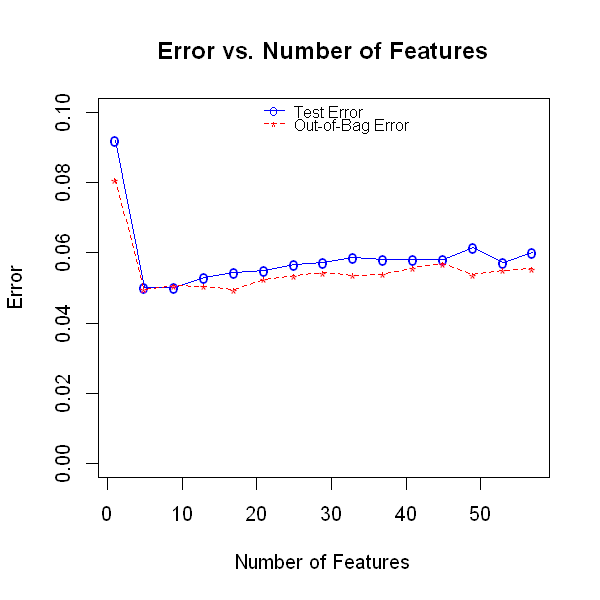

In [485]:
options(repr.plot.width=5, repr.plot.height=5)

plot(m, test_err, type="o", col="blue", pch="o", lty=1, ylim=c(0,0.1),xlab="Number of Features",ylab="Error",main="Error vs. Number of Features" )
points(m, oob_err, col="red", pch="*")
lines(m, oob_err, col="red",lty=2)
legend("top",legend=c("Test Error","Out-of-Bag Error"), bty="n",col=c("blue","red"),pch=c("o","*"),lty=c(1,2), ncol=1,cex=0.8)


theoretically, out of bag error should generally be higher than test error.However in this case it's the opposite, the out of bad error is just below the test error. Overall, both error plots follow the same pattern, a drastic dip in the beginning as number of feature increases, until the addtion of more feature does not improve the performance of the algorithm. This can be due to the increase in correlation between trees as number of features increases, leading to error rate going up slightly. 